In [1]:
import os
print(os.listdir('/kaggle/input/'))

['tweets-clean-posneg-v1', 'visualize-v9']


In [2]:
# Install spaCy language model (run once in the notebook)
!python -m spacy download en_core_web_sm --quiet

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
import os
import spacy
import shutil


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 72.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
# Đường dẫn dữ liệu
processed_data_path = "/kaggle/input/tweets-clean-posneg-v1/final_clean_no_neutral_no_duplicates_v1.csv"

# Kiểm tra và tải dữ liệu
try:
    if os.path.exists(processed_data_path):
        data = pd.read_csv(processed_data_path)
        print("Data loaded successfully!")
        print(f"Total rows in dataset: {len(data)}")
        print("First few rows of the dataset:")
        print(data.head())  # In 5 dòng đầu để kiểm tra dữ liệu
    else:
        print(f"File does not exist at: {processed_data_path}")
        print("Please check the file path or file name!")
        exit()
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# Kiểm tra xem data có dữ liệu không (sau khi đã load)
if data.empty:
    print("The dataset is empty. Please check the CSV file or path.")
    exit()

# Lấy mẫu 100,000 dòng nếu dataset đủ lớn
if len(data) < 100000:
    print(f"Dataset only has {len(data)} rows, which is less than 100,000. Using all available data.")
    data_sample = data
else:
    data_sample = data.sample(n=100000, random_state=42)
    print("Sampled 100,000 rows from the dataset to reduce processing time.")

# Chuyển đổi và làm sạch dữ liệu
data_sample['target'] = pd.to_numeric(data_sample['target'], errors='coerce')
data_sample = data_sample.dropna(subset=['target'])
print(f"Rows after cleaning: {len(data_sample)}")

# Sao chép file visualize.py từ dataset visualize-v6 sang /kaggle/working/
source_visualize_path = "/kaggle/input/visualize-v9/visualize.py"
destination_visualize_path = "/kaggle/working/visualize.py"

if os.path.exists(source_visualize_path):
    try:
        shutil.copy(source_visualize_path, destination_visualize_path)
        print(f"File 'visualize.py' đã được sao chép vào /kaggle/working/")
        print("Files in /kaggle/working:", os.listdir("/kaggle/working/"))
    except Exception as e:
        print(f"Error copying visualize.py: {e}")
        exit()
else:
    print(f"File 'visualize.py' does not exist at: {source_visualize_path}")
    print("Please check the file path or dataset!")
    exit()

# Import DataVisualizer từ file visualize.py đã sao chép
from visualize import DataVisualizer

# Khởi tạo visualizer
visualizer = DataVisualizer(data_sample)

# In danh sách phương thức
print(dir(visualizer))

Data loaded successfully!
Total rows in dataset: 1652310
First few rows of the dataset:
   target                                               text  \
0     0.0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1     0.0  is upset that he can't update his Facebook by ...   
2     0.0  @Kenichan I dived many times for the ball. Man...   
3     0.0    my whole body feels itchy and like its on fire    
4     0.0  @nationwideclass no, it's not behaving at all....   

                                          text_clean  text_length  \
0  switchfoot awww thats bummer shoulda got david...           19   
1  upset cant update facebook texting might cry r...           21   
2  kenichan dived many times ball managed save  r...           18   
3                   whole body feels itchy like fire           10   
4           nationwideclass behaving im mad cant see           21   

   text_clean_length  
0                 10  
1                 12  
2                 10  
3                  6

In [4]:
# Lấy 100,000 dòng dữ liệu
data_100k = data.sample(n=100000, random_state=42)  # Lấy ngẫu nhiên 100,000 dòng

# Kiểm tra độ dài văn bản trong cột text_clean
text_length = len(' '.join(data_100k['text_clean'].dropna().astype(str)))
print(f"Length of text in 100,000 rows: {text_length} characters")

Length of text in 100,000 rows: 5364695 characters


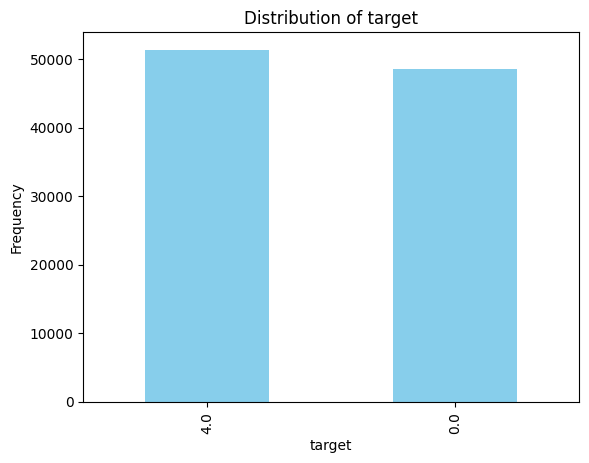

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


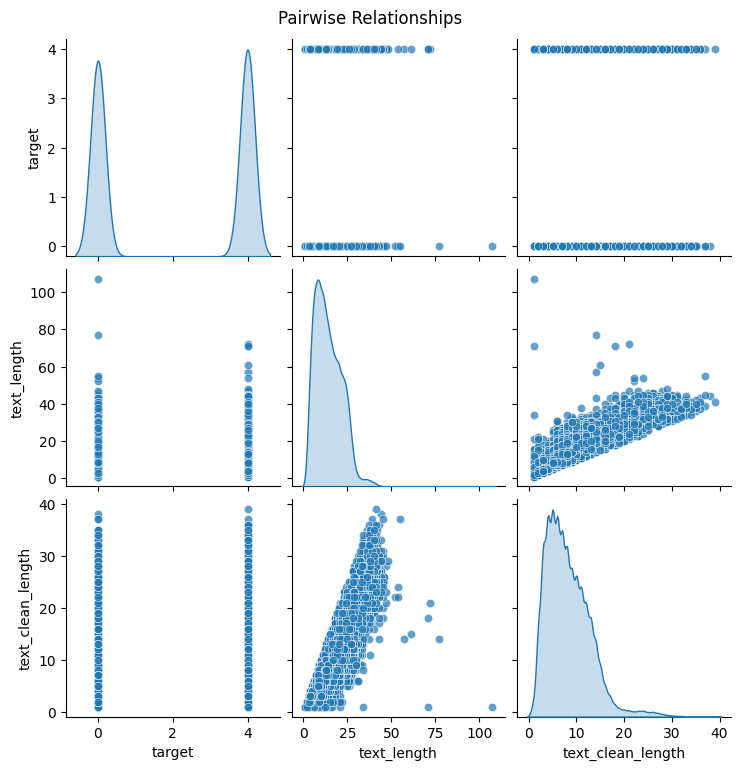

In [5]:
visualizer.plot_class_distribution("target")
plt.show()
visualizer.plot_all_relationships()
plt.show()

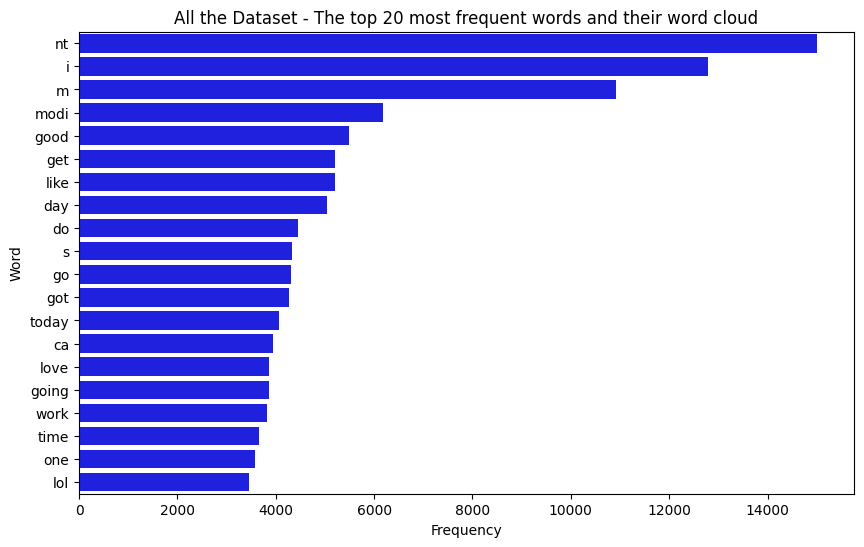

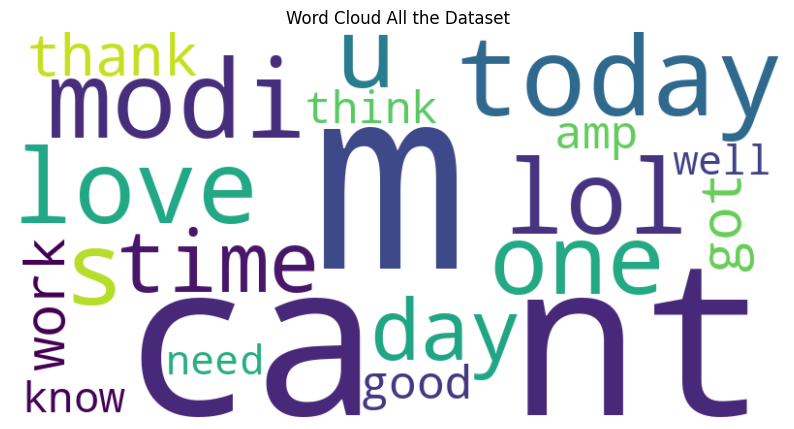

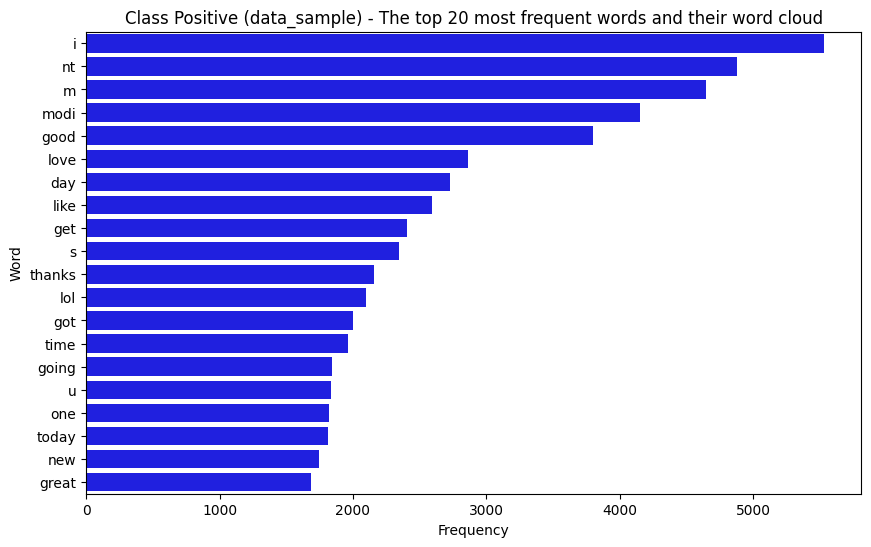

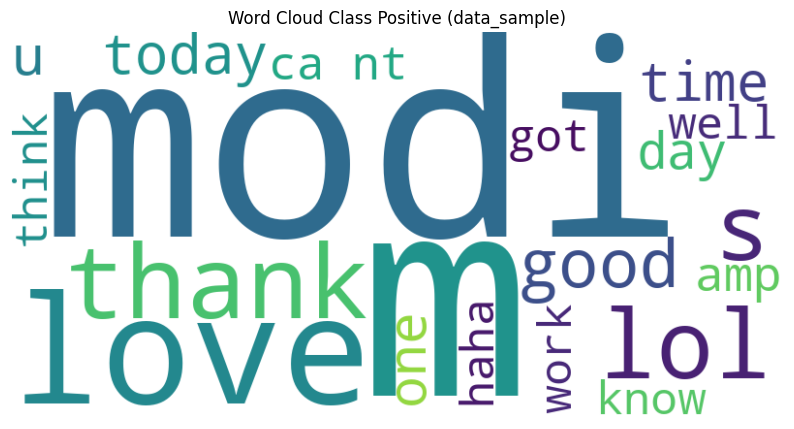

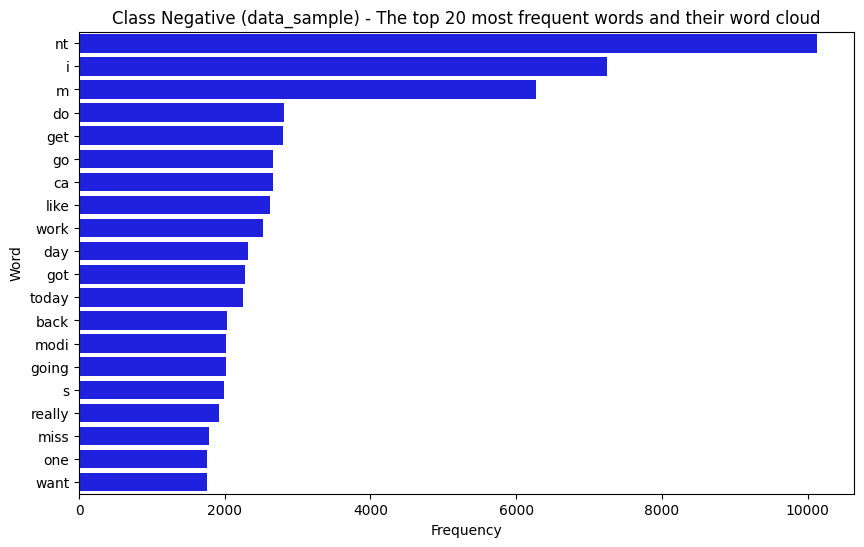

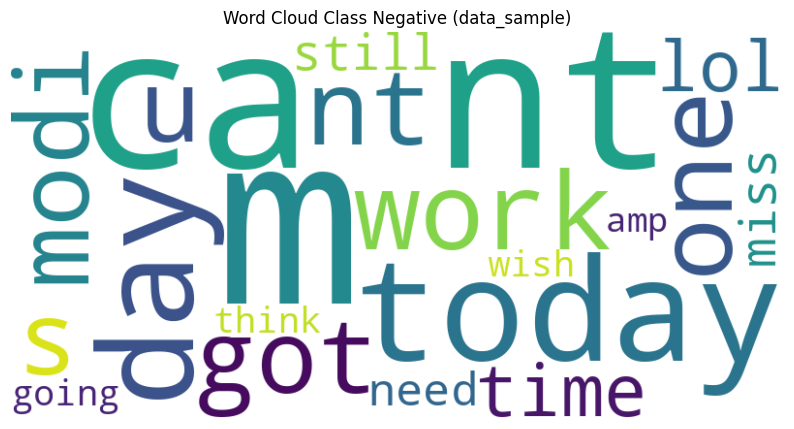

In [6]:
visualizer.plot_top_words_and_wordcloud(data = data_sample, text_column='text_clean')
visualizer.plot_positive_words_and_wordcloud(text_column='text_clean')
visualizer.plot_negative_words_and_wordcloud(text_column='text_clean')

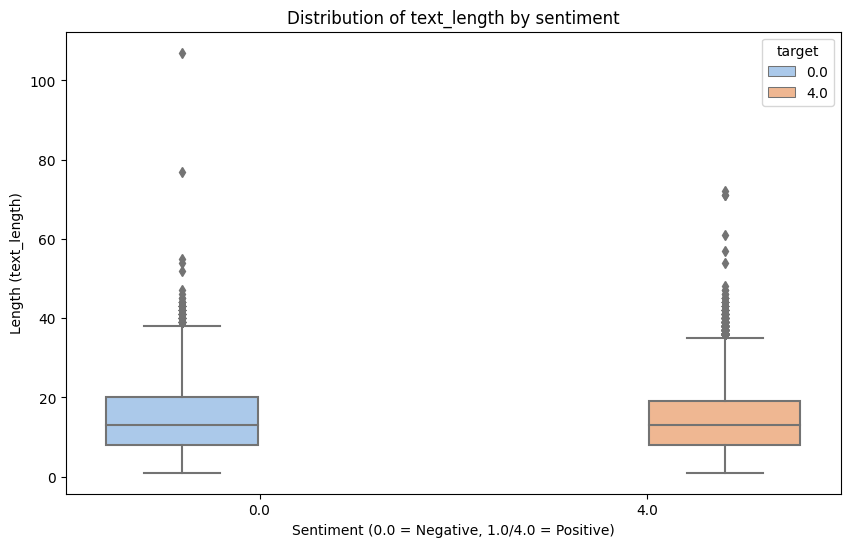

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


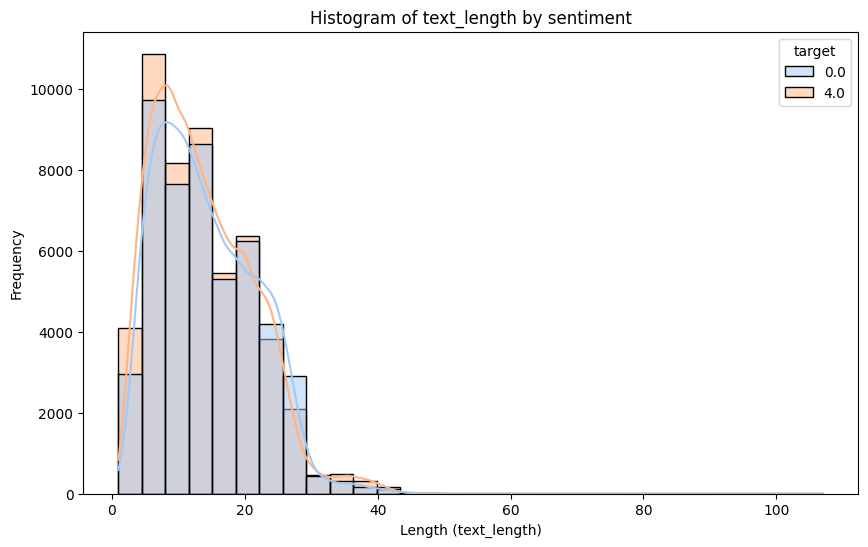

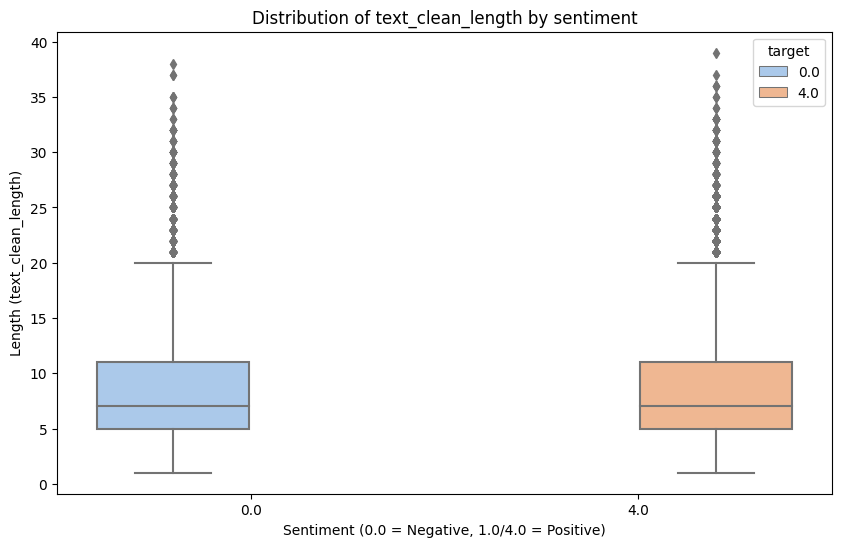

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


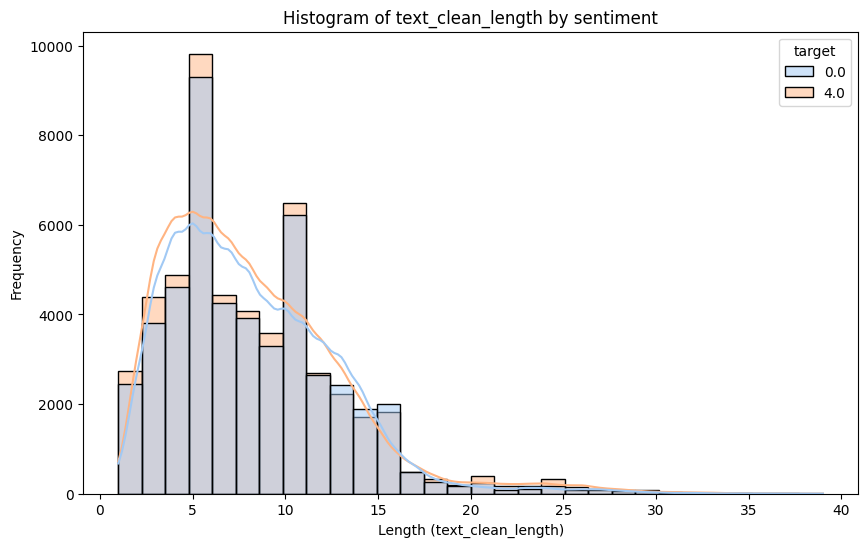

Unique values in target: [4. 0.]


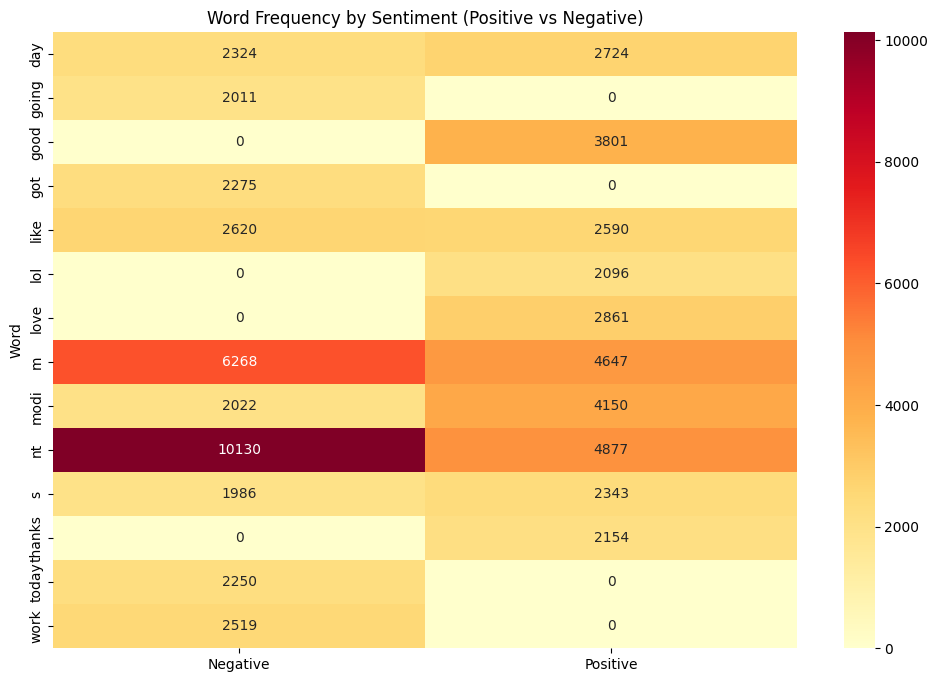

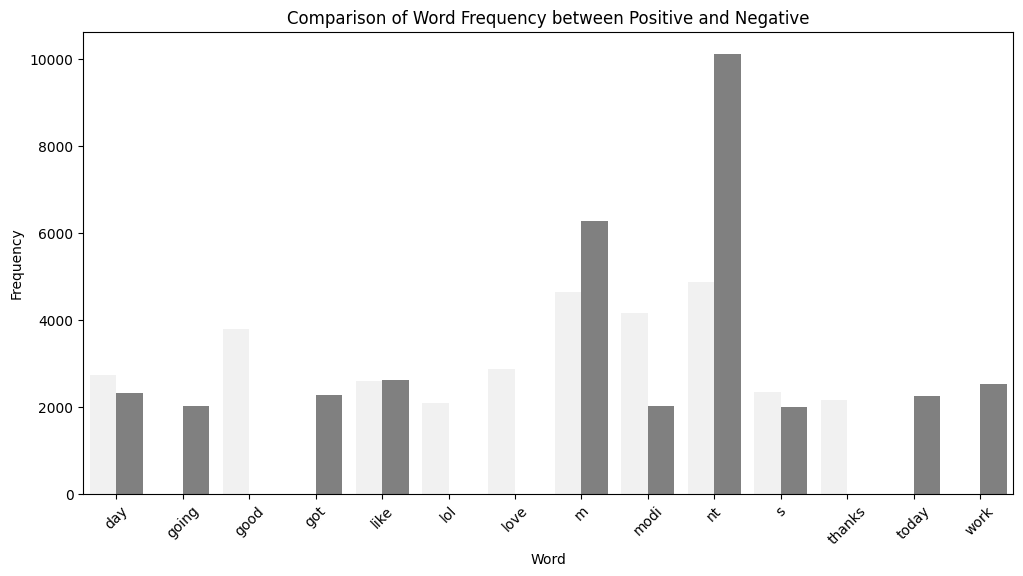

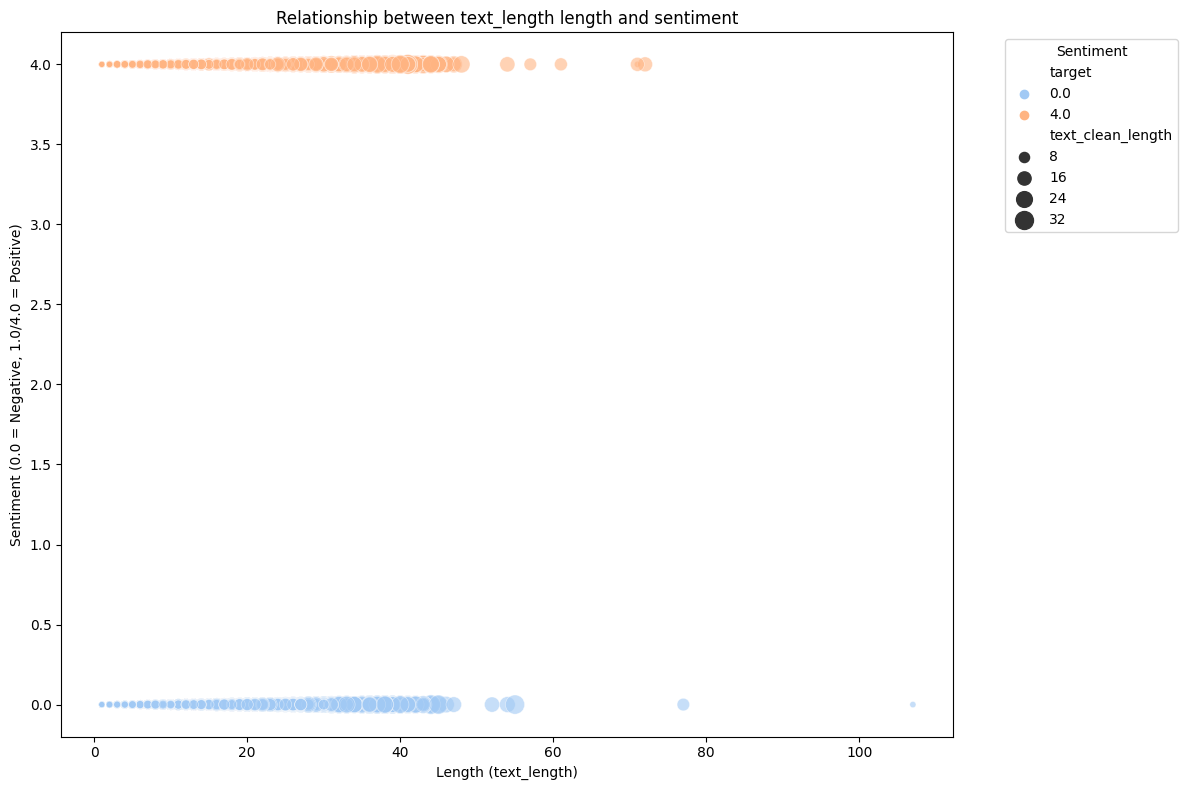

In [7]:
visualizer.plot_text_length_distribution()
plt.show()
visualizer.plot_word_frequency_by_sentiment(data_sample)
plt.show()
visualizer.plot_length_sentiment_scatter()
plt.show()